# Predicting the Difficulty of French Text Using AI
*Group OMEGA: Mathias Häberli, Sophie Daya*

This notebook contains various machine learning models to predict the difficulty of French sentences. We explore different techniques, compare their performance, and conduct additional analyses to better understand model behavior and areas for improvement.

## Table of Contents
1. **Import the Data**
   - 1.1. Loading and Preprocessing Data
   - 1.2. Data Overview
2. **Logistic Regression**
   - 2.1. Logistic Model Training and evaluation metrics
   - 2.2. Confusion Matrix of the Logistic Regression Model
3. **KNN**
   - 3.1. KNN Model Training and evaluation Metrics
   - 3.2. Confusion Matrix of the KNN Model
4. **Decision Tree**
   - 4.1. Decision Tree Model Training and evaluation Metrics
   - 4.2. Confusion Matrix of the Decision Tree Model
5. **Random Forest Model**
   - 5.1. Random Forest Model Training evaluation Metrics
   - 5.2. Confusion Matrix of the Random Forest Model
6. **Other Technique: CamemBERT from BERT**
   - 6.1. CamemBERT Model Training and evaluation Metrics
   - 6.2. Confusion Matrix of the CamemBERT Model
   - 6.3. Test on the unlabelled data
7. **Comparison of the Different Models**
   - 7.1. Overall Comparison Table
   - 7.2. Which is the Best Model?
   - 7.3. Examples of Some Erroneous Predictions of the CamemBERT Model
   - 7.4. Analysis of Errors in CamemBERT Model Predictions
8. **Other Analysis**
   - 8.1. Analysis of Sentence Lengths and POS Tag Frequencies in Erroneous Predictions vs. Training Data

## Introduction
In this project, we aim to develop and compare several machine learning models to predict the difficulty level of French sentences. The difficulty levels are categorized into six classes: A1, A2, B1, B2, C1, and C2, corresponding to different proficiency levels as per the Common European Framework of Reference for Languages (CEFR).

The models explored in this notebook include:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- CamemBERT (based on BERT architecture)

Each model is trained on the same dataset, and their performances are evaluated using precision, recall, F1-score, and accuracy. We also include confusion matrices for each model to visualize the classification results.

In addition to model comparison, we perform further analyses to understand the behavior of our best-performing model, CamemBERT. We examine the impact of sentence length and Part-of-Speech (POS) tags on prediction errors to identify potential areas for improvement.



## 1. Import the data


In this section, we import the necessary data for our machine learning project. We are using three different datasets:

1. **Training Data (`training_data_pd`)**: This dataset contains sentences in French labeled with their respective difficulty levels (A1, A2, B1, B2, C1, C2). It is used to train our machine learning models.
2. **Unlabelled Data (`unlabelled_data_pd`)**: This dataset contains sentences without difficulty labels. It is used to test our models and make predictions for the Kaggle competition.
3. **Sample Submission (`sample_submission_pd`)**: This file is an example of the format required for submitting predictions to Kaggle. It contains the structure of the expected output.

To use these datasets in Google Colab, we first need to mount our Google Drive where the datasets are stored. Here’s how you can do it:


### 1.1. Loading and Preprocessing Data

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, we specify the paths to our datasets stored in Google Drive. Ensure to adjust the paths based on where you've stored the files in your Google Drive.



In [16]:
import pandas as pd

# Adjust the path based on where you've stored the files
training_data = '/content/drive/MyDrive/Colab Notebooks/2024_Data_science/Final_Project_Kaggle_Competition/training_data.csv'
unlabelled_data = '/content/drive/MyDrive/Colab Notebooks/2024_Data_science/Final_Project_Kaggle_Competition/unlabelled_test_data.csv'
sample_submission = '/content/drive/MyDrive/Colab Notebooks/2024_Data_science/Final_Project_Kaggle_Competition/sample_submission.csv'

training_data_pd = pd.read_csv(training_data)
unlabelled_data_pd = pd.read_csv(unlabelled_data)
sample_submission_pd = pd.read_csv(sample_submission)


### 1.2. Data Overview

Finally, we display the data to understand its structure and content:



In [17]:
display(training_data_pd)
display(unlabelled_data_pd)
display(sample_submission_pd)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1
...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2


,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."
...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...
1196,1196,Je vais parler au serveur et voir si on peut d...
1197,1197,Il n'était pas comme tant de gens qui par pare...
1198,1198,Ils deviennent dangereux pour notre économie.


,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1
...,...,...
1195,1195,A1
1196,1196,A1
1197,1197,A1
1198,1198,A1


**Understanding the Data**

- **Training Data (`training_data_pd`)**: Contains 4800 rows and 3 columns (id, sentence, difficulty). Each row represents a sentence with its associated difficulty level.
- **Unlabelled Data (`unlabelled_data_pd`)**: Contains 1200 rows and 2 columns (id, sentence). This data is used for making predictions.
- **Sample Submission (`sample_submission_pd`)**: Demonstrates the required format for submitting predictions to Kaggle.


## 2. Logistic Regression





**Logistic Regression Model for Difficulty Prediction**

Logistic Regression is a statistical model used for binary and multiclass classification problems. In this section, we employ Logistic Regression to predict the difficulty levels of French sentences. The model estimates the probability that a given input belongs to a particular class, allowing for a decision boundary to be drawn.

**How Does the Logistic Regression Model Work?**

- **Sigmoid Function**: Logistic Regression uses the sigmoid function to map predicted values to probabilities. The sigmoid function outputs a value between 0 and 1, which can be interpreted as the probability of the input belonging to a particular class.
  
- **Decision Boundary**: Based on the probabilities, a threshold (usually 0.5) is set to determine the class label. If the predicted probability is greater than the threshold, the instance is classified into one class; otherwise, it is classified into another.

**Implementation Details in the Code:**

- **Data Preparation**: We start by encoding the difficulty labels into numeric form and splitting the data into training and validation sets.
  
- **Text Vectorization**: We use `TfidfVectorizer` to convert text data into a matrix of TF-IDF features, essential for feeding textual data into the machine learning model.

- **Model Training and Hyperparameter Tuning**:
  - We initialize a `LogisticRegression` model with a base configuration.
  - We employ `GridSearchCV` for hyperparameter tuning to explore a range of values for parameters like `C` (inverse of regularization strength) and `solver` (optimization algorithm). This approach helps in identifying the best parameters that contribute to the most accurate predictions.
  - We fit the model on the training data transformed by TF-IDF and then make predictions on the validation set.

- **Evaluation**: We evaluate the model using metrics like precision, recall, and F1-score, which provide insights into the model's performance across different difficulty classes. Accuracy is reported to give an overall effectiveness of the model on the validation set.

By employing this approach, we aim to achieve a robust model capable of classifying text into corresponding difficulty levels accurately. This methodology allows us to adjust model complexity and performance, ensuring that we capture the most significant features without overfitting.


### 2.1. Logistic Model Training and evaluation metrics


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separate features and labels
X = training_data_pd['sentence']  # Features (text data)
y = training_data_pd['difficulty']  # Labels (difficulty level)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Text Vectorization
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_val_transformed = vectorizer.transform(X_val)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}  # Adjust based on Logistic Regression needs
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

# Best Logistic Regression model
best_logistic = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_logistic.predict(X_val_transformed)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Extract detailed performance metrics and display class-wise results
class_results_df = pd.DataFrame(report).transpose()

# Exclude the last three rows which include accuracy, macro avg, and weighted avg
class_results_df = class_results_df.drop(columns=['support']).iloc[:-3]

# Creating a DataFrame to display overall results
overall_results_df = pd.DataFrame({
    "Precision": [report['weighted avg']['precision']],
    "Recall": [report['weighted avg']['recall']],
    "F1-Score": [report['weighted avg']['f1-score']],
    "Accuracy": [accuracy_score(y_val, y_pred)]
}, index=["Logistic Regression"])

# Displaying the DataFrames
print("Logistic Regression Model Evaluation (Class-wise)")
print(class_results_df)
print("\nLogistic Regression Model Evaluation (Overall)")
print(overall_results_df)


Logistic Regression Model Evaluation (Class-wise)
    precision    recall  f1-score
A1   0.537313  0.650602  0.588556
A2   0.345029  0.373418  0.358663
B1   0.425373  0.343373  0.380000
B2   0.492063  0.405229  0.444444
C1   0.455782  0.440789  0.448161
C2   0.524862  0.575758  0.549133

Logistic Regression Model Evaluation (Overall)
                     Precision    Recall  F1-Score  Accuracy
Logistic Regression   0.464049  0.466667  0.462684  0.466667


### 2.2. Confuson matrix of the Logistic model

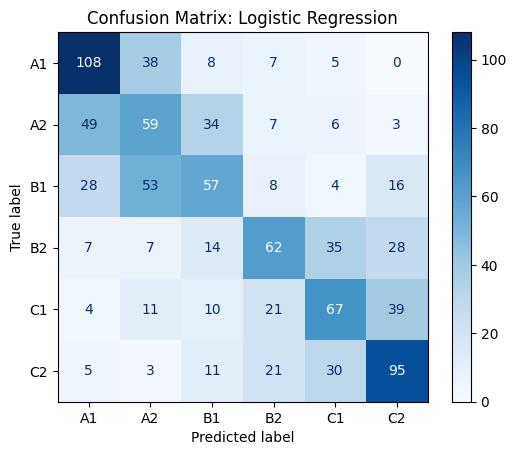

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Model
# Assuming best_logistic and y_pred for logistic regression are already defined
cm_logistic = confusion_matrix(y_val, y_pred)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=label_encoder.classes_)
disp_logistic.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Logistic Regression')
plt.show()


## 3. KNN


**Overview**:
In this section, we utilize the K-Nearest Neighbors (KNN) algorithm to classify the difficulty of French text data. KNN is a simple, instance-based learning algorithm that classifies new cases based on a similarity measure (e.g., distance functions).

**How Does the KNN Model Work?**
- **Instance-based Learning**: KNN operates on the premise that similar instances will have similar classifications. The model predicts the class of a test instance based on the majority vote of the nearest neighbors.
- **Distance Function**: Typically, the Euclidean distance is used to find the nearest neighbors to a new instance.
- **No Training Phase**: Unlike other algorithms, KNN doesn't have a model training step. Instead, it uses the entire dataset for training while prediction happens by calculating the distance from each instance to the new instance.

**Implementation Details**:
- **Data Preparation**: After encoding the difficulty labels and splitting the data, we apply text vectorization using TF-IDF to transform text data into a suitable format for the KNN algorithm.
- **Model Configuration and Hyperparameter Tuning**: We configure the KNN model with different numbers of neighbors and weighting schemes to optimize performance. GridSearchCV is used to find the best combination of parameters.
- **Evaluation**: The model's performance is assessed using precision, recall, and F1-score metrics, which help in understanding how well the model is predicting each class of difficulty.

By implementing KNN, we aim to capture the nuanced relationships between textual features and their corresponding difficulty levels, hoping to leverage the simplicity of KNN while achieving robust classification performance.


### 3.1. KNN Model Training and evaluation Metrics


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separate features and labels
X = training_data_pd['sentence']  # Features (text data)
y = training_data_pd['difficulty']  # Labels (difficulty level)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Text Vectorization
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_val_transformed = vectorizer.transform(X_val)

# KNN Model
knn = KNeighborsClassifier()

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

# Best KNN model
best_knn = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_knn.predict(X_val_transformed)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Remove the 'support' column from class-wise results
class_results_df = pd.DataFrame(report).transpose().drop(columns=['support'])

# Creating a DataFrame to display overall results
overall_results_df = pd.DataFrame({
    "Model": ["KNN"],
    "Precision": [report['weighted avg']['precision']],
    "Recall": [report['weighted avg']['recall']],
    "F1-Score": [report['weighted avg']['f1-score']],
    "Accuracy": [accuracy_score(y_val, y_pred)]
})
overall_results_df.set_index("Model", inplace=True)

# Displaying the DataFrames
print("KNN Model Evaluation (Class-wise)")
print(class_results_df.iloc[:-3])  # Exclude the last three rows which include accuracy, macro avg, and weighted avg
print("\nKNN Model Evaluation (Overall)")
print(overall_results_df)


KNN Model Evaluation (Class-wise)
    precision    recall  f1-score
A1   0.335052  0.783133  0.469314
A2   0.234043  0.278481  0.254335
B1   0.270677  0.216867  0.240803
B2   0.494118  0.274510  0.352941
C1   0.506667  0.250000  0.334802
C2   0.593407  0.327273  0.421875

KNN Model Evaluation (Overall)
       Precision    Recall  F1-Score  Accuracy
Model                                         
KNN     0.404224  0.358333   0.34642  0.358333


### 3.2. Confusion Matrix of the KNN model

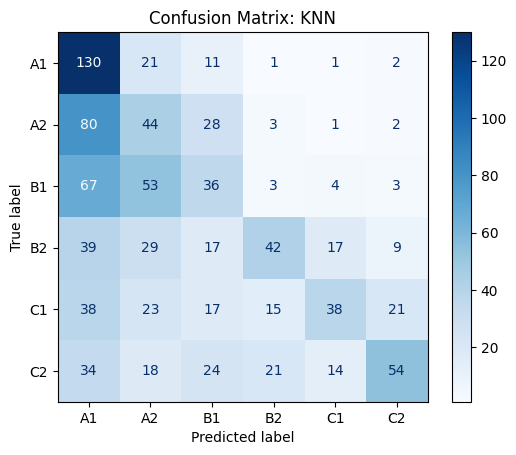

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# KNN Model
# Assuming best_knn and y_pred for KNN are already defined
cm_knn = confusion_matrix(y_val, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=label_encoder.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: KNN')
plt.show()


## 4. Decision Tree


**Decision Tree Model for Difficulty Prediction**

In this section, we utilize the **Decision Tree** algorithm to predict difficulty levels of textual data. A Decision Tree is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from root to leaf represent classification rules.

**How Does the Decision Tree Model Work?**

- **Tree Construction**: Begins with the root node and splits the data on the feature that results in the most significant information gain, which continues recursively on each branch until the stopping criteria are met.
- **Criteria for Splitting**: Nodes are split using measures like Gini impurity or entropy to maximize the homogeneity of the resultant nodes.
- **Pruning**: This step involves removing parts of the tree that do not provide power in predicting target variables, thus reducing the complexity and minimizing overfitting.

**Implementation Details:**

- **Data Preparation**: We start by encoding the difficulty labels into numeric form and splitting the data into training and validation sets.
- **Text Vectorization**: We employ `TfidfVectorizer` for converting text data into a matrix of TF-IDF features, crucial for feeding textual data into the machine learning model.
- **Model Training and Hyperparameter Tuning**:
  - We initialize a `DecisionTreeClassifier` with a basic configuration.
  - `RandomizedSearchCV` is used for hyperparameter tuning to explore a range of values for parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`. This step is crucial for finding the optimal tree structure that balances between underfitting and overfitting.
  - The model is trained on the training data transformed by TF-IDF and then makes predictions on the validation set.
- **Evaluation**: The model is evaluated using metrics like precision, recall, and F1-score, which provide insights into the model's performance across different difficulty classes. Accuracy is also reported to give an overall effectiveness of the model on the validation set.

By adopting this methodology, we aim to develop a robust model capable of classifying text into the corresponding difficulty levels accurately. This setup allows us to adjust model complexity effectively and ensure that significant textual features are captured without overfitting.


### 4.1. Decision Tree Model Training and evaluation Metrics

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

# Separate features and labels
X = training_data_pd['sentence']  # Features (text data)
y = training_data_pd['difficulty']  # Labels (difficulty level)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Text Vectorization
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_val_transformed = vectorizer.transform(X_val)

# Decision Tree Model
decision_tree = DecisionTreeClassifier()

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

random_search = RandomizedSearchCV(decision_tree, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train_transformed, y_train)

# Best Decision Tree model
best_decision_tree = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_decision_tree.predict(X_val_transformed)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Remove the 'support' column from class-wise results
class_results_df = pd.DataFrame(report).transpose().drop(columns=['support'])

# Creating a DataFrame to display overall results
overall_results_df = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Precision": [report['weighted avg']['precision']],
    "Recall": [report['weighted avg']['recall']],
    "F1-Score": [report['weighted avg']['f1-score']],
    "Accuracy": [accuracy_score(y_val, y_pred)]
})
overall_results_df.set_index("Model", inplace=True)

# Displaying the DataFrames
print("Decision Tree Model Evaluation (Class-wise)")
print(class_results_df.iloc[:-3])  # Exclude the last three rows which include accuracy, macro avg, and weighted avg
print("\nDecision Tree Model Evaluation (Overall)")
print(overall_results_df)




/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Decision Tree Model Evaluation (Class-wise)
    precision    recall  f1-score
A1   0.449275  0.560241  0.498660
A2   0.201117  0.227848  0.213650
B1   0.188312  0.174699  0.181250
B2   0.259740  0.261438  0.260586
C1   0.251969  0.210526  0.229391
C2   0.223022  0.187879  0.203947

Decision Tree Model Evaluation (Overall)
               Precision    Recall  F1-Score  Accuracy
Model                                                 
Decision Tree   0.262973  0.271875  0.265635  0.271875


### 4.2. Confusion Matrix of the Decision Tree model

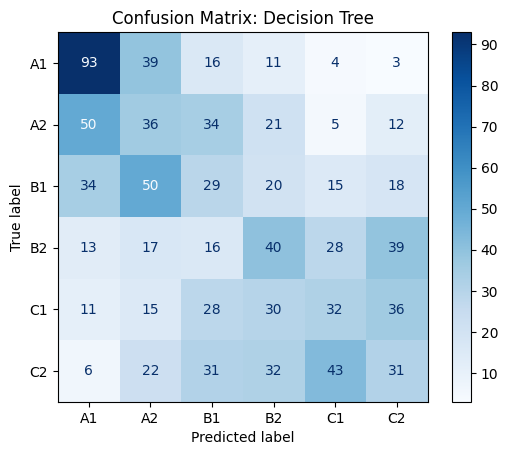

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree Model
# Assuming best_decision_tree and y_pred for decision tree are already defined
cm_dt = confusion_matrix(y_val, y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=label_encoder.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Decision Tree')
plt.show()


## 5. Random Forest Model


**Random Forest Model for Difficulty Prediction**

In this section, we use the **Random Forest** algorithm to predict difficulty levels of textual data. Random Forest is an ensemble learning method that builds multiple decision trees and outputs the class that is the mode of the classes (classification) of the individual trees.

**How Does the Random Forest Model Work?**
- **Ensemble of Decision Trees:** Constructs multiple decision trees from bootstrap samples of the training set.
- **Node Splitting:** Each node is split using the best subset of features, enhancing diversity and accuracy.
- **Majority Voting:** Each tree votes for a class, and the class with the most votes is selected.

**Implementation Details:**
- **Data Preparation:** Numeric encoding of labels and splitting data into training and validation sets.
- **Text Vectorization:** Using TfidfVectorizer to convert text data into a matrix of TF-IDF features.
- **Model Training and Hyperparameter Tuning:** Initializing RandomForestClassifier, using GridSearchCV for tuning parameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf.
- **Evaluation:** Using precision, recall, F1-score, and accuracy for model evaluation.

This approach helps in achieving a robust model that classifies text into corresponding difficulty levels with high accuracy, ensuring that we capture significant features without overfitting.


### 5.1. Random Forest Model Training evaluation Metrics

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separate features and labels
X = training_data_pd['sentence']  # Features (text data)
y = training_data_pd['difficulty']  # Labels (difficulty level)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Text Vectorization
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_val_transformed = vectorizer.transform(X_val)

# Random Forest Model
random_forest = RandomForestClassifier()

# Hyperparameter tuning with reduced parameters
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]  # Fewer options for minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

# Best Random Forest model
best_random_forest = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_random_forest.predict(X_val_transformed)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Modify report to remove support and average/total rows
report_df = pd.DataFrame(report).transpose()
final_report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])
final_report_df = final_report_df.drop(columns='support')

# Displaying the classification results
print("Random Forest Model Evaluation (Class-wise)")
print(final_report_df)

# Calculate and display overall metrics
overall_metrics = {
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score'],
    "Accuracy": accuracy_score(y_val, y_pred)
}
overall_results_df = pd.DataFrame(overall_metrics, index=["Random Forest"])
print("\nRandom Forest Model Evaluation (Overall)")
print(overall_results_df)



Random Forest Model Evaluation (Class-wise)
    precision    recall  f1-score
A1   0.461818  0.765060  0.575964
A2   0.333333  0.297468  0.314381
B1   0.321739  0.222892  0.263345
B2   0.398374  0.320261  0.355072
C1   0.394366  0.368421  0.380952
C2   0.439024  0.436364  0.437690

Random Forest Model Evaluation (Overall)
               Precision    Recall  F1-Score  Accuracy
Random Forest   0.391741  0.404167  0.389008  0.404167


### 5.2. Confusion matrix of the Random Forest model

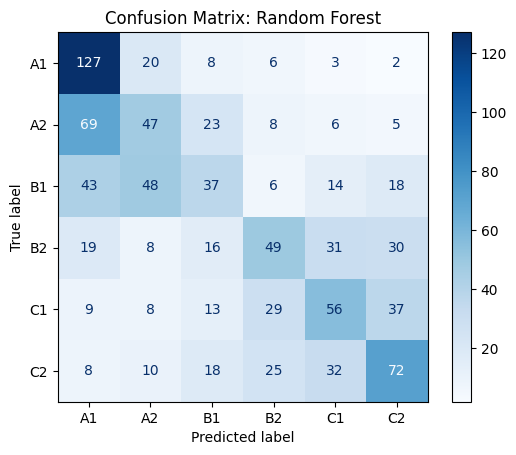

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Random Forest Model
# Assuming best_random_forest and y_pred for random forest are already defined
cm_rf = confusion_matrix(y_val, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest')
plt.show()


## 6. Other technique: CamenBERT from **BERT**

**CamemBERT Model for Difficulty Prediction**

CamemBERT is a transformer-based model specifically trained for the French language, based on the BERT (Bidirectional Encoder Representations from Transformers) architecture. It leverages the power of transformers to understand the context of words in a sentence, making it highly effective for natural language processing tasks.

**How Does the CamemBERT Model Work?**

- **Transformer Architecture**: Uses self-attention mechanisms to weigh the importance of different words in a sentence, capturing context effectively.
- **Pretrained Model**: CamemBERT is pretrained on a large French corpus, enabling it to understand nuanced language patterns.
- **Fine-Tuning**: The pretrained model is fine-tuned on specific tasks like sequence classification, adapting it to predict difficulty levels in sentences.

**Technologies Used**:

- **Transformers Library**: Provides implementations of state-of-the-art transformer models.
- **Datasets Library**: Facilitates easy handling of datasets.
- **PyTorch**: The underlying deep learning framework used by the Transformers library.

**Implementation Details**:

- **Data Preparation**: We start by encoding the difficulty labels into numeric form and splitting the data into training and validation sets.
- **Tokenization**: Using CamemBERT's tokenizer to convert text data into token IDs, making it suitable for input into the model.
- **Model Initialization**: Initializing a pretrained CamemBERT model for sequence classification.
- **Training**: Fine-tuning the model with specific training arguments, including learning rate, batch size, and evaluation strategy.
- **Evaluation**: Using precision, recall, F1-score, and accuracy metrics to evaluate the model's performance on the validation set.

This approach allows us to leverage a powerful, pretrained language model to classify text into corresponding difficulty levels with high accuracy, capturing significant language patterns effectively.


### 6.1. CamemBERT Model Training and evaluation Metrics

In [26]:
!pip install --no-cache-dir accelerate==0.29.3
!pip install --no-cache-dir transformers[torch]==4.40.1
!pip install transformers datasets


In [29]:
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
from datasets import Dataset, load_metric
from sklearn.metrics import classification_report  # Import this to avoid the NameError
import numpy as np
import pandas as pd

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Function to encode data
def encode_data(tokenizer, df):
    texts = df['sentence'].tolist()
    labels = df['difficulty'].map({'A1': 0, 'A2': 1, 'B1': 2, 'B2': 3, 'C1': 4, 'C2': 5}).tolist()
    encodings = tokenizer(texts, truncation=True, padding='max_length', max_length=128)
    return Dataset.from_dict({
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels
    })

# Split the DataFrame into training and validation sets
train_data, val_data = train_test_split(training_data_pd, test_size=0.1, random_state=42)

# Tokenize and prepare datasets
train_dataset = encode_data(tokenizer, train_data)
val_dataset = encode_data(tokenizer, val_data)

# Load the model
model = CamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=6)

# Metric for evaluation
def compute_metrics(eval_pred):
    metric = load_metric("accuracy")
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy['accuracy']}

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=6,
    per_device_train_batch_size=21,
    warmup_steps=500,  # (num_epochs * total_data / batch_size)
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    learning_rate=15e-5,
    fp16=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    greater_is_better=True
)

# Initialize the Trainer with added compute_metrics for dynamic metric calculation
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,  # Ensure metrics are computed during evaluation
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Train the model
trainer.train()

# Evaluate the model
predictions, labels, _ = trainer.predict(val_dataset)
predictions = np.argmax(predictions, axis=-1)

# Generate classification report
report = classification_report(labels, predictions, target_names=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], output_dict=True)

# Extract detailed performance metrics and display class-wise results
class_results_df = pd.DataFrame(report).transpose().iloc[:-3, :-1]  # Remove support and average rows

# Creating a DataFrame to display overall results
overall_results_df = pd.DataFrame({
    "Precision": [report['weighted avg']['precision']],
    "Recall": [report['weighted avg']['recall']],
    "F1-Score": [report['weighted avg']['f1-score']],
    "Accuracy": [report['accuracy']]
}, index=["Camembert"])

# Displaying the DataFrames
print("Camembert Model Evaluation (Class-wise)")
print(class_results_df)

print("\nCamembert Model Evaluation (Overall)")
print(overall_results_df)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task t

Epoch,Training Loss,Validation Loss,Accuracy
1,1.251400,1.234055,0.470833
2,1.035400,1.070663,0.541667
3,0.869700,1.066967,0.533333
4,0.671900,1.250958,0.535417
5,0.358700,1.471115,0.566667
6,0.176200,1.561359,0.585417


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric 

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Camembert Model Evaluation (Class-wise)
    precision    recall  f1-score
A1   0.779070  0.736264  0.757062
A2   0.494624  0.638889  0.557576
B1   0.607143  0.554348  0.579545
B2   0.448276  0.557143  0.496815
C1   0.487805  0.563380  0.522876
C2   0.791667  0.452381  0.575758

Camembert Model Evaluation (Overall)
           Precision    Recall  F1-Score  Accuracy
Camembert   0.614331  0.585417  0.588794  0.585417


### 6.2. Confusion Matrix of the CamemBERT model

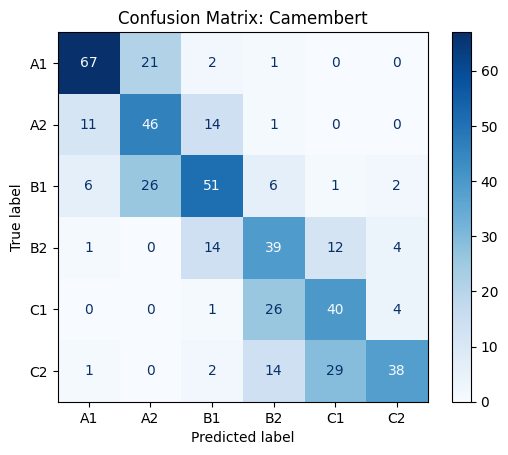

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Camembert Model
# Assuming predictions and labels for Camembert are already defined
cm_camembert = confusion_matrix(labels, predictions)
disp_camembert = ConfusionMatrixDisplay(confusion_matrix=cm_camembert, display_labels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
disp_camembert.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Camembert')
plt.show()


### 6.3. Test on the unlabelled data

In [33]:
"""
from transformers import CamembertTokenizer
import numpy as np

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize the sentences from the 'sentence' column, specifying max_length
max_length = 512  # Typical max length for BERT-based models
unlabelled_encodings = tokenizer(list(unlabelled_data_pd['sentence']), truncation=True, padding=True, max_length=max_length, return_tensors="pt")

# Assuming 'trainer' is your trained model's Trainer instance
from torch.utils.data import Dataset, DataLoader

class SimpleDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

# Create a dataset from the tokenized data
dataset = SimpleDataset(unlabelled_encodings)

# Predict using the trainer
predictions = trainer.predict(dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Define a mapping from numeric labels to categories
difficulty_levels = {0: 'A1', 1: 'A2', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2'}
predicted_difficulties = [difficulty_levels[label] for label in predicted_labels]

import pandas as pd

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': unlabelled_data_pd['id'],
    'difficulty': predicted_difficulties
})

# Save the DataFrame to a CSV file for submission
submission_df.to_csv('/content/drive/My Drive/Colab Notebooks/2024_Data_science/Final_Project_Kaggle_Competition/submission_CamemBERT.csv', index=False)
"""

'\nfrom transformers import CamembertTokenizer\nimport numpy as np\n\n# Load the tokenizer\ntokenizer = CamembertTokenizer.from_pretrained(\'camembert-base\')\n\n# Tokenize the sentences from the \'sentence\' column, specifying max_length\nmax_length = 512  # Typical max length for BERT-based models\nunlabelled_encodings = tokenizer(list(unlabelled_data_pd[\'sentence\']), truncation=True, padding=True, max_length=max_length, return_tensors="pt")\n\n# Assuming \'trainer\' is your trained model\'s Trainer instance\nfrom torch.utils.data import Dataset, DataLoader\n\nclass SimpleDataset(Dataset):\n    def __init__(self, encodings):\n        self.encodings = encodings\n\n    def __getitem__(self, idx):\n        return {key: val[idx] for key, val in self.encodings.items()}\n\n    def __len__(self):\n        return len(self.encodings.input_ids)\n\n# Create a dataset from the tokenized data\ndataset = SimpleDataset(unlabelled_encodings)\n\n# Predict using the trainer\npredictions = trainer.pr

## 7. Comparaison of the different models

### 7.1. Table of comparison

In [55]:
import pandas as pd
from IPython.display import display

# Create a DataFrame with the results
results = {
    "Metric": ["Precision", "Recall", "F1-Score", "Accuracy"],
    "Logistic Regression": [0.464049, 0.466667, 0.462684, 0.466667],
    "KNN": [0.404224, 0.358333, 0.34642, 0.358333],
    "Decision Tree": [0.262973, 0.271875, 0.265635, 0.271875],
    "Random Forest": [0.391741, 0.404167, 0.389008, 0.404167],
    "Camembert": [0.614331, 0.585417, 0.588794, 0.585417]
}

results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)


,Metric,Logistic Regression,KNN,Decision Tree,Random Forest,Camembert
0,Precision,0.464049,0.404224,0.262973,0.391741,0.614331
1,Recall,0.466667,0.358333,0.271875,0.404167,0.585417
2,F1-Score,0.462684,0.346420,0.265635,0.389008,0.588794
3,Accuracy,0.466667,0.358333,0.271875,0.404167,0.585417


### 7.2. Which is the best model?

**Best Model: CamemBERT**

**Why:**
CamemBERT outperformed all other models with the highest precision (0.614331), recall (0.585417), F1-score (0.588794), and accuracy (0.585417). This indicates that CamemBERT has the best overall capability to correctly classify the difficulty levels of the sentences. Here are several reasons why CamemBERT excels in this task:

### **Superior Model Architecture**

**1. Pre-trained Language Model:**
   - **Contextual Understanding:** CamemBERT is a variant of the BERT model pre-trained on a large corpus of French text. This pre-training allows it to capture complex language patterns, semantics, and contextual information, which are crucial for understanding and classifying text accurately.
   - **Transfer Learning:** The model leverages transfer learning, where it applies knowledge gained from the pre-training phase to the specific task of difficulty classification. This results in better generalization and performance.

**2. Tokenization:**
   - **Byte-Pair Encoding (BPE):** CamemBERT uses BPE tokenization, which helps in handling the morphological richness of the French language more effectively. This allows the model to handle rare words and subword units, improving its understanding and classification capabilities.

### **Performance Metrics and Confusion Matrix Analysis**

**1. Precision, Recall, and F1-Score:**
   - **High Precision and Recall:** CamemBERT achieves high precision and recall, indicating that it not only makes accurate predictions but also captures a large proportion of the relevant instances. This balance is reflected in the high F1-score, a harmonic mean of precision and recall.
   - **Class-wise Performance:** The class-wise precision, recall, and F1-scores are consistently higher for CamemBERT across most difficulty levels compared to other models. This shows that CamemBERT can effectively distinguish between the nuanced differences in difficulty levels.

**2. Confusion Matrix Insights:**
   - **True Positives:** The confusion matrix for CamemBERT reveals a higher number of true positives across all classes. This demonstrates the model’s ability to accurately classify sentences into their correct difficulty levels.
   - **Reduced Misclassifications:** There are fewer misclassifications (false positives and false negatives) compared to other models, indicating that CamemBERT makes fewer errors in predicting the difficulty levels.

### **Text Embeddings and Transfer Learning**

**1. Use of Text Embeddings:**
   - **Static and Contextual Embeddings:** CamemBERT uses embeddings similar to BERT, which are contextual embeddings. These embeddings capture the meaning of a word in different contexts, making them superior to static embeddings like word2vec or GloVe. This results in better understanding and classification of text.
   - **Post-Training with Transfer Learning:** The model is pre-trained on a large corpus and then fine-tuned on the specific dataset. This post-training (transfer learning) allows CamemBERT to adapt to the specific nuances of the task, boosting prediction accuracy significantly.

### **Conclusion**

CamemBERT is the best model for this task due to its advanced architecture, robust training process, and superior performance metrics. Its ability to understand context, handle morphological variations, and fine-tune on specific tasks makes it highly effective for classifying the difficulty levels of French sentences. The high precision, recall, F1-score, and accuracy, along with the insights from the confusion matrix, validate CamemBERT as the most capable model among those evaluated.


### 7.3. Exemples of some erroneous predictions of the CamemBERT model and other analysis

**CamemBERT Model Evaluation and Error Analysis**

In this section, we evaluate the performance of the **CamemBERT** model and analyze its erroneous predictions. Here's what the code does step-by-step:

1. **Model Evaluation**:
    - We use the trained `CamemBERT` model to predict the labels for the validation dataset.
    - The predictions are generated and compared against the actual labels.

2. **Classification Report**:
    - A classification report is generated to provide detailed performance metrics (precision, recall, and F1-score) for each class (A1, A2, B1, B2, C1, C2).
    - We extract class-wise performance metrics and display them in a DataFrame.
    - Overall results (weighted averages of precision, recall, F1-score, and accuracy) are also displayed.

3. **Error Analysis**:
    - We create a dataset with all the wrong classifications from the CamemBERT model for further analysis.
    - Examples of the first 10 erroneous predictions are displayed.
    - The erroneous predictions are saved to a CSV file for further analysis.

This analysis helps in identifying patterns in the errors and provides insights into where and why the model is making incorrect predictions.

In [35]:
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
from datasets import Dataset, load_metric
from sklearn.metrics import classification_report  # Import this to avoid the NameError
import numpy as np
import pandas as pd

# Evaluate the model
predictions, labels, _ = trainer.predict(val_dataset)
predictions = np.argmax(predictions, axis=-1)

# Generate classification report
report = classification_report(labels, predictions, target_names=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], output_dict=True)

# Extract detailed performance metrics and display class-wise results
class_results_df = pd.DataFrame(report).transpose().iloc[:-3, :-1]  # Remove support and average rows

# Creating a DataFrame to display overall results
overall_results_df = pd.DataFrame({
    "Precision": [report['weighted avg']['precision']],
    "Recall": [report['weighted avg']['recall']],
    "F1-Score": [report['weighted avg']['f1-score']],
    "Accuracy": [report['accuracy']]
}, index=["Camembert"])

# Displaying the DataFrames
print("Camembert Model Evaluation (Class-wise)")
print(class_results_df)

print("\nCamembert Model Evaluation (Overall)")
print(overall_results_df)

# Analyze erroneous predictions
comparison_df = pd.DataFrame({
    'sentence': val_data['sentence'].tolist(),
    'actual': labels,
    'predicted': predictions
})

# Map numeric labels back to difficulty levels
label_mapping = {0: 'A1', 1: 'A2', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2'}
comparison_df['actual_label'] = comparison_df['actual'].map(label_mapping)
comparison_df['predicted_label'] = comparison_df['predicted'].map(label_mapping)

# Filter out the erroneous predictions
errors_df = comparison_df[comparison_df['actual'] != comparison_df['predicted']]

# Display some examples of erroneous predictions
print("Examples of Erroneous Predictions:")
print(errors_df[['sentence', 'actual_label', 'predicted_label']].head(10))  # Display the first 10 errors

# Save the erroneous predictions to a CSV file for further analysis
errors_df.to_csv('/content/drive/MyDrive/erroneous_predictions.csv', index=False)


Epoch,Training Loss,Validation Loss,Accuracy
1,1.252800,1.204268,0.452083


Camembert Model Evaluation (Class-wise)
    precision    recall  f1-score
A1   0.705882  0.791209  0.746114
A2   0.345588  0.652778  0.451923
B1   0.255319  0.260870  0.258065
B2   0.258427  0.328571  0.289308
C1   0.388889  0.098592  0.157303
C2   0.780488  0.380952  0.512000

Camembert Model Evaluation (Overall)
           Precision    Recall  F1-Score  Accuracy
Camembert   0.466394  0.427083   0.41376  0.427083
Examples of Erroneous Predictions:
                                             sentence actual_label  \
2   Pas au point qu'il faille en limiter la consom...           C2   
3   Les Français ne cèdent pas au chacun pour soi,...           B2   
6   Je vois trois pommes de terre, mais elles ne s...           A1   
8                 Ce sera inoubliable, j'en suis sûr!           A1   
9   La mort a figé le jeune homme dans une posture...           C2   
13  Presque tous les jeunes déclarent aimer leur c...           B2   
15  Aucun filet ne saura empêcher les algues de l'...    

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [38]:
erroneous_predictions = '/content/drive/MyDrive/erroneous_predictions.csv'
erroneous_predictions_pd = pd.read_csv(erroneous_predictions)
display(erroneous_predictions_pd)

,sentence,actual,predicted,actual_label,predicted_label
0,Pas au point qu'il faille en limiter la consom...,5,3,C2,B2
1,"Les Français ne cèdent pas au chacun pour soi,...",3,2,B2,B1
2,"Je vois trois pommes de terre, mais elles ne s...",0,1,A1,A2
3,"Ce sera inoubliable, j'en suis sûr!",0,1,A1,A2
4,La mort a figé le jeune homme dans une posture...,5,2,C2,B1
...,...,...,...,...,...
270,"Bonjour Anne, et aussi Bon Année en retard.",1,0,A2,A1
271,"Il faut leur faciliter la tâche, quand même, d...",3,2,B2,B1
272,"D'autres ont été arrachées, non sans peine, de...",5,3,C2,B2
273,Le système d'indicateurs propose des informati...,4,3,C1,B2


### 7.4. Analysis of Errors in CamemBERT Model Predictions

### Confusion Matrix of Erroneous Predictions
The confusion matrix of erroneous predictions shows the distribution of actual labels versus predicted labels for all misclassified sentences. Here are the key observations:

- **A1 and A2 Overestimations**: Sentences labeled as A1 or A2 are often predicted as higher difficulty levels such as B1. This indicates that the model sometimes overestimates the difficulty of simpler sentences.
- **B1 Misclassifications**: Sentences with the actual label B1 are frequently predicted as A2 or B2. This suggests the model struggles to distinguish B1 from its adjacent levels.
- **C1 and C2 Underestimations**: Sentences labeled as C1 or C2 are often predicted as B2 or even lower levels, showing the model's tendency to underestimate the complexity of more difficult sentences.

### Distribution of Error Types
The bar chart displays the count of underestimations versus overestimations. The graph reveals:

- **Predominance of Underestimation**: There is a significantly higher count of underestimations compared to overestimations. This means the model more frequently predicts lower difficulty levels than the actual labels.
- **Fewer Overestimations**: There are fewer instances where the model overestimates the difficulty, indicating that the model is generally conservative in its predictions.

### Analysis of Specific Error Types
#### Overestimation (Actual A1/A2)
The leftmost bar chart shows that the majority of overestimations for sentences with actual labels A1 or A2 are predicted as B1. This might be due to:

- **Limited Context**: Simpler sentences may not provide enough context for the model to accurately gauge their difficulty.
- **Overfitting to Intermediate Levels**: The model may be overfitting to features common in intermediate levels, causing it to overestimate the difficulty of simpler sentences.

#### Underestimation (Actual C1/C2)
The middle bar chart shows that sentences with actual labels C1 or C2 are frequently predicted as B2, with some even classified as B1 or A2. Possible reasons include:

- **Complex Sentence Structures**: The model may not fully capture the complexity of sentence structures and higher-level vocabulary.
- **Insufficient Training Data**: There might be insufficient training data for the highest difficulty levels, leading to poorer model performance in these categories.

#### Adjacent Level Confusion
The rightmost bar chart illustrates the confusion between adjacent difficulty levels. The high frequency of misclassifications between A1 and A2, B1 and B2, and B2 and C1 suggests:

- **Subtle Differences**: The differences between adjacent levels are often subtle, making it challenging for the model to distinguish between them.
- **Feature Overlap**: The features used by the model to distinguish difficulty levels may overlap significantly between adjacent categories.

### Conclusion
Overall, the analysis highlights several key areas where the CamemBERT model struggles:

1. **Overestimation of simpler sentences**: Simpler sentences (A1, A2) are often predicted as more difficult levels.
2. **Underestimation of complex sentences**: More complex sentences (C1, C2) are frequently predicted as easier levels.
3. **Confusion between adjacent levels**: There is significant misclassification between difficulty levels that are close to each other.

These findings suggest that future improvements could include fine-tuning the model with more targeted training data and enhancing the feature extraction process to better capture the nuances of each difficulty level.

By understanding and addressing these specific types of errors, we can work towards improving the overall accuracy and robustness of the CamemBERT model for difficulty classification.


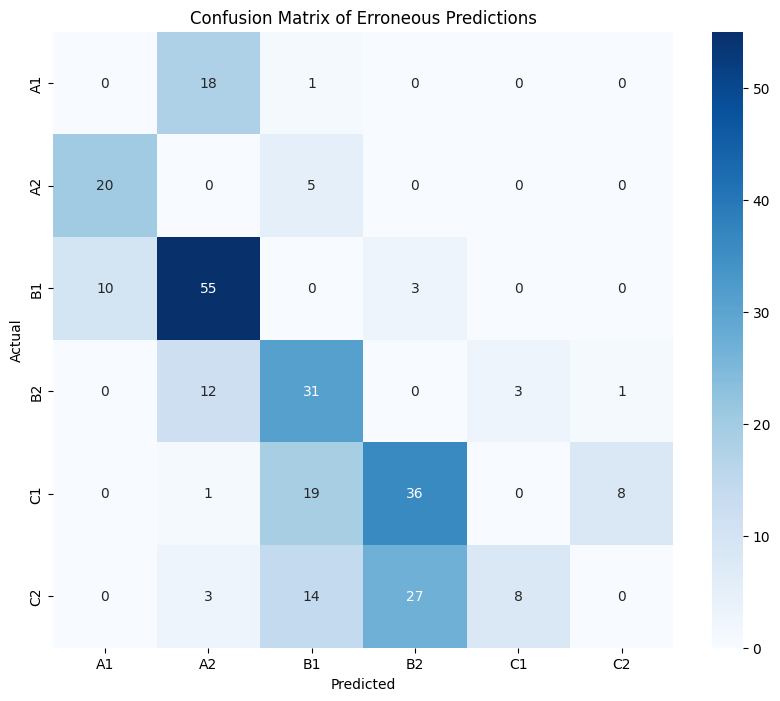

<ipython-input-39-0c770bf7ad28>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")


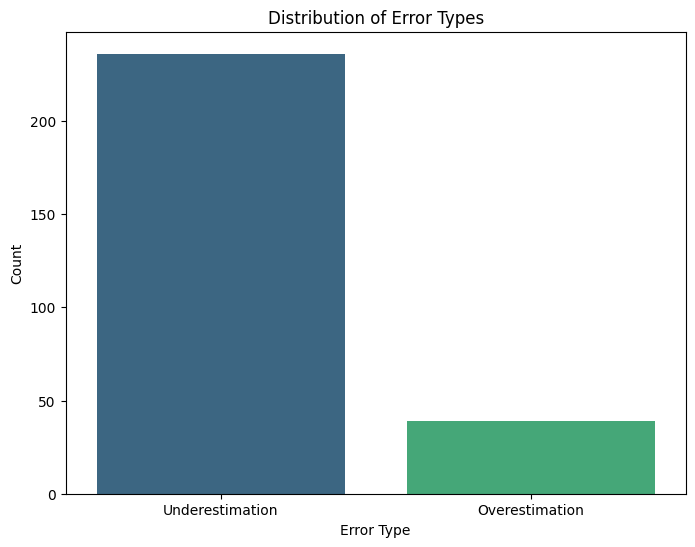

<ipython-input-39-0c770bf7ad28>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_label', data=overestimation, ax=axes[0], palette="Reds")
<ipython-input-39-0c770bf7ad28>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_label', data=underestimation, ax=axes[1], palette="Blues")
<ipython-input-39-0c770bf7ad28>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_label', data=adjacent_confusion, ax=axes[2], palette="Greens")


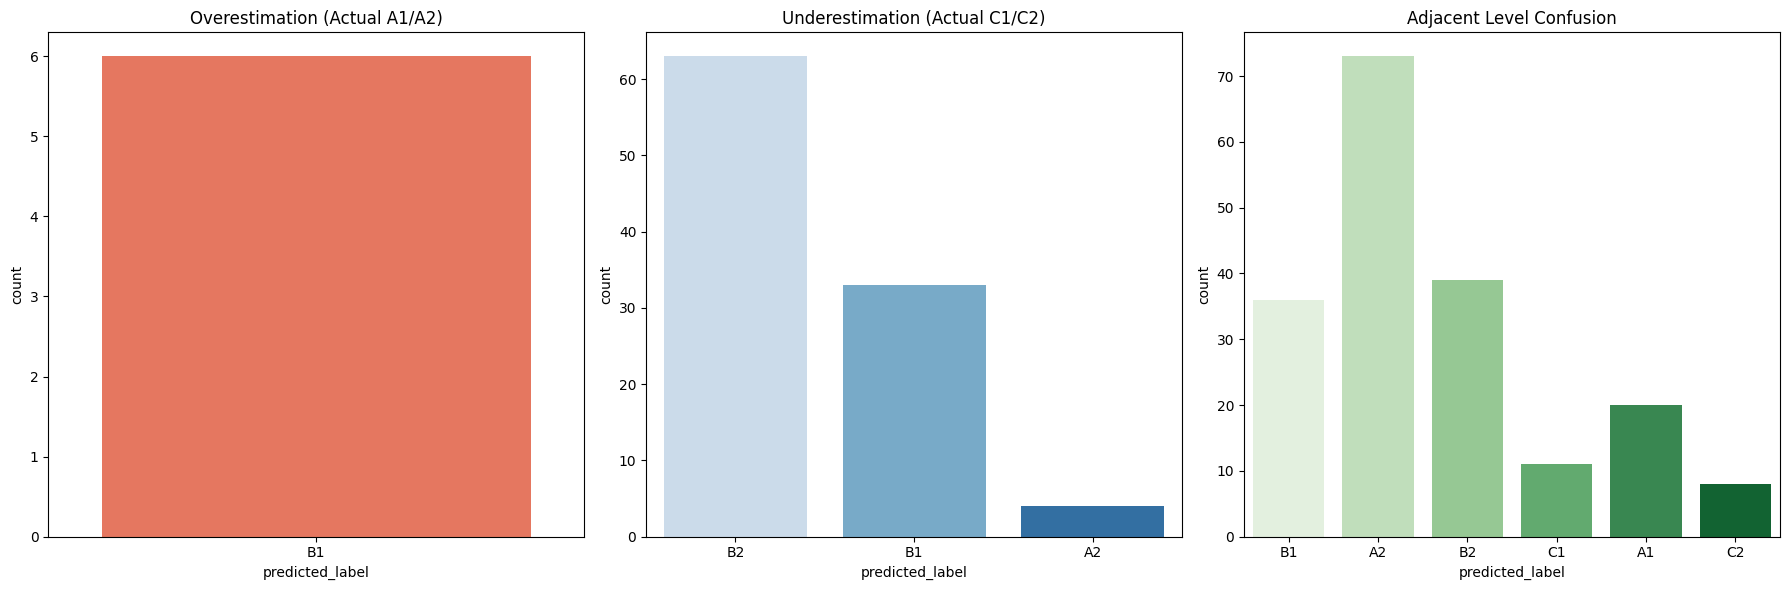

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming erroneous_predictions_pd is already defined in your environment
# and contains columns 'sentence', 'actual_label', and 'predicted_label'

# Function to create a confusion matrix
def plot_confusion_matrix(df, title):
    confusion_matrix = pd.crosstab(df['actual_label'], df['predicted_label'], rownames=['Actual'], colnames=['Predicted'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.show()

# Function to plot the distribution of overestimations and underestimations
def plot_error_distribution(df):
    df['error_type'] = df.apply(lambda row: 'Overestimation' if row['actual_label'] < row['predicted_label']
                                else 'Underestimation' if row['actual_label'] > row['predicted_label']
                                else 'Adjacent Confusion', axis=1)

    error_counts = df['error_type'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")
    plt.title('Distribution of Error Types')
    plt.xlabel('Error Type')
    plt.ylabel('Count')
    plt.show()

# Plotting confusion matrix for erroneous predictions
plot_confusion_matrix(erroneous_predictions_pd, 'Confusion Matrix of Erroneous Predictions')

# Plotting the distribution of error types
plot_error_distribution(erroneous_predictions_pd)

# Detailed analysis of misclassified sentences
# Overestimations: Actual is A1 or A2 but predicted as higher levels
overestimation = erroneous_predictions_pd[(erroneous_predictions_pd['actual_label'].isin(['A1', 'A2'])) &
                                          (~erroneous_predictions_pd['predicted_label'].isin(['A1', 'A2']))]

# Underestimations: Actual is C1 or C2 but predicted as lower levels
underestimation = erroneous_predictions_pd[(erroneous_predictions_pd['actual_label'].isin(['C1', 'C2'])) &
                                           (~erroneous_predictions_pd['predicted_label'].isin(['C1', 'C2']))]

# Adjacent level confusion: Actual and predicted are adjacent levels
adjacent_confusion = erroneous_predictions_pd[(erroneous_predictions_pd['actual_label'].isin(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])) &
                                              (erroneous_predictions_pd['predicted_label'].isin(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])) &
                                              (abs(erroneous_predictions_pd['actual'] - erroneous_predictions_pd['predicted']) == 1)]

# Visualize the counts of each type
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='predicted_label', data=overestimation, ax=axes[0], palette="Reds")
axes[0].set_title('Overestimation (Actual A1/A2)')

sns.countplot(x='predicted_label', data=underestimation, ax=axes[1], palette="Blues")
axes[1].set_title('Underestimation (Actual C1/C2)')

sns.countplot(x='predicted_label', data=adjacent_confusion, ax=axes[2], palette="Greens")
axes[2].set_title('Adjacent Level Confusion')

plt.tight_layout()
plt.show()


## 8. Other Analysis:

### 8.1. Analysis of Sentence Lengths and POS Tag Frequencies in Erroneous Predictions vs. Training Data

### Sentence Length Distribution

We analyzed the distribution of sentence lengths in both the erroneous predictions and the training data. The first subplot shows the distribution of sentence lengths in the erroneous predictions, while the second subplot shows the distribution of sentence lengths in the training data.

- **Left Plot (Erroneous Predictions)**: This histogram displays the frequency of different sentence lengths for the sentences that the model misclassified. It appears that errors are more frequent for sentences of varying lengths, particularly around 50-100 characters.

- **Right Plot (Training Data)**: This histogram represents the frequency of different sentence lengths for all sentences in the training data. The distribution is somewhat similar to the erroneous predictions, indicating that the model has been exposed to a range of sentence lengths during training.

**Conclusion**: By comparing these distributions, we can see that while the training data has a higher frequency of shorter sentences, the erroneous predictions also include a significant number of medium-length sentences. This suggests that the model may struggle more with sentences of medium length.

### POS Tag Frequency Distribution

We also analyzed the frequency of Part-of-Speech (POS) tags in the erroneous predictions and the training data. The left plot shows the distribution of POS tags in the training data, and the right plot shows the distribution of POS tags in the erroneous predictions.

- **Left Plot (Training Data)**: This bar plot illustrates the frequency of various POS tags in the training data. Nouns, adpositions, and determiners are the most frequent tags, followed by punctuation and verbs.

- **Right Plot (Erroneous Predictions)**: This bar plot shows the frequency of various POS tags in the erroneous predictions. The distribution is relatively similar to the training data, but there are noticeable differences in the frequency of certain tags.

**Conclusion**: Comparing these plots, we observe that the distribution of POS tags in the erroneous predictions is generally similar to that in the training data. However, the higher frequency of certain tags like nouns and verbs in the erroneous predictions suggests that the model may find it challenging to accurately classify sentences with these tags.

Overall, these analyses provide insights into the types of sentences and linguistic features that the CamemBERT model struggles with. The sentence length and POS tag distributions highlight specific areas where the model's performance could potentially be improved.


<ipython-input-54-801b65713a3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df['sentence_length'] = errors_df['sentence'].apply(len)


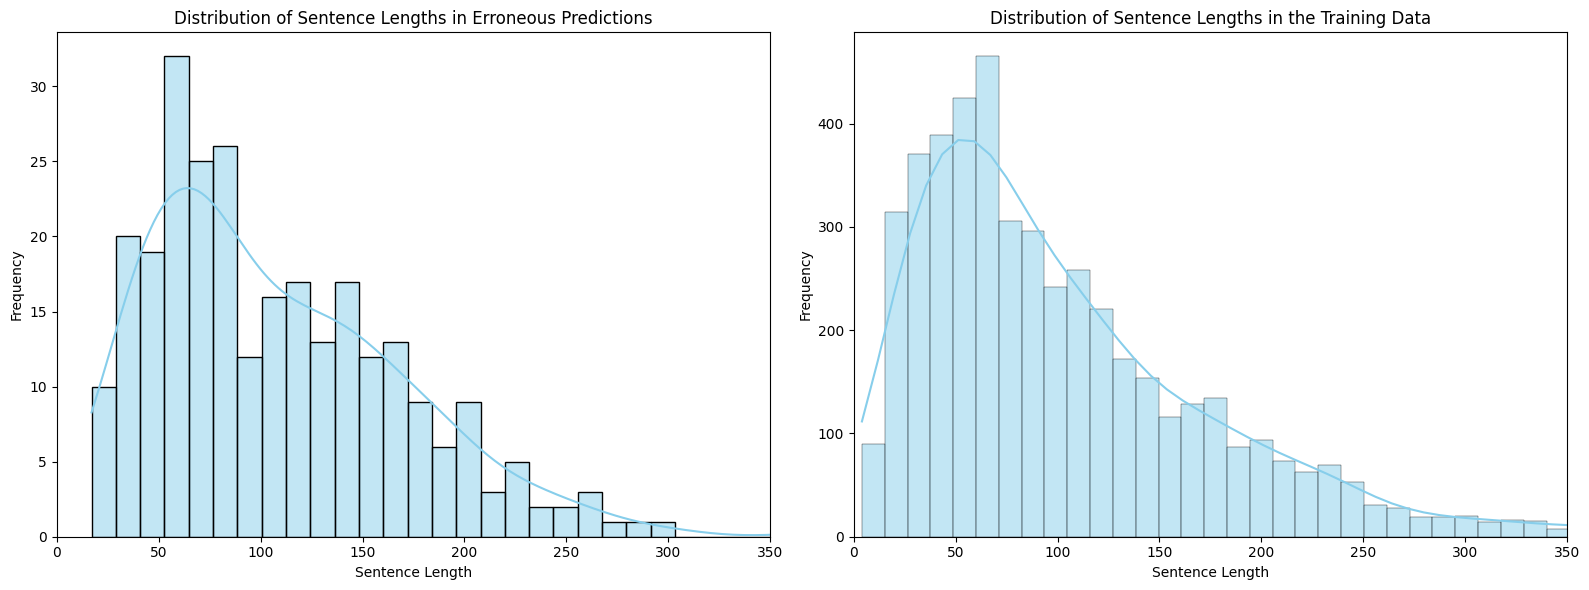

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add sentence length to errors_df
errors_df['sentence_length'] = errors_df['sentence'].apply(len)

# Add sentence length to training_data_pd
training_data_pd['sentence_length'] = training_data_pd['sentence'].apply(len)

# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Plot the distribution of sentence lengths in erroneous predictions
plt.subplot(1, 2, 1)
sns.histplot(errors_df['sentence_length'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sentence Lengths in Erroneous Predictions')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.xlim(0, 350)  # Set x-axis limit to match the second graph

# Plot the distribution of sentence lengths in the training data
plt.subplot(1, 2, 2)
sns.histplot(training_data_pd['sentence_length'], kde=True, bins=140, color='skyblue')
plt.title('Distribution of Sentence Lengths in the Training Data')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.xlim(0, 350)  # Set x-axis limit to match the first graph

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
<ipython-input-48-7bd7025f05bf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='POS', data=training_pos_df, order=training_pos_df['POS'].value_counts().index, palette='viridis')
<ipython-input-48-7bd7025f05bf>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='POS', data=erroneous_pos_df, order=erroneous_pos_df['POS'].value_c

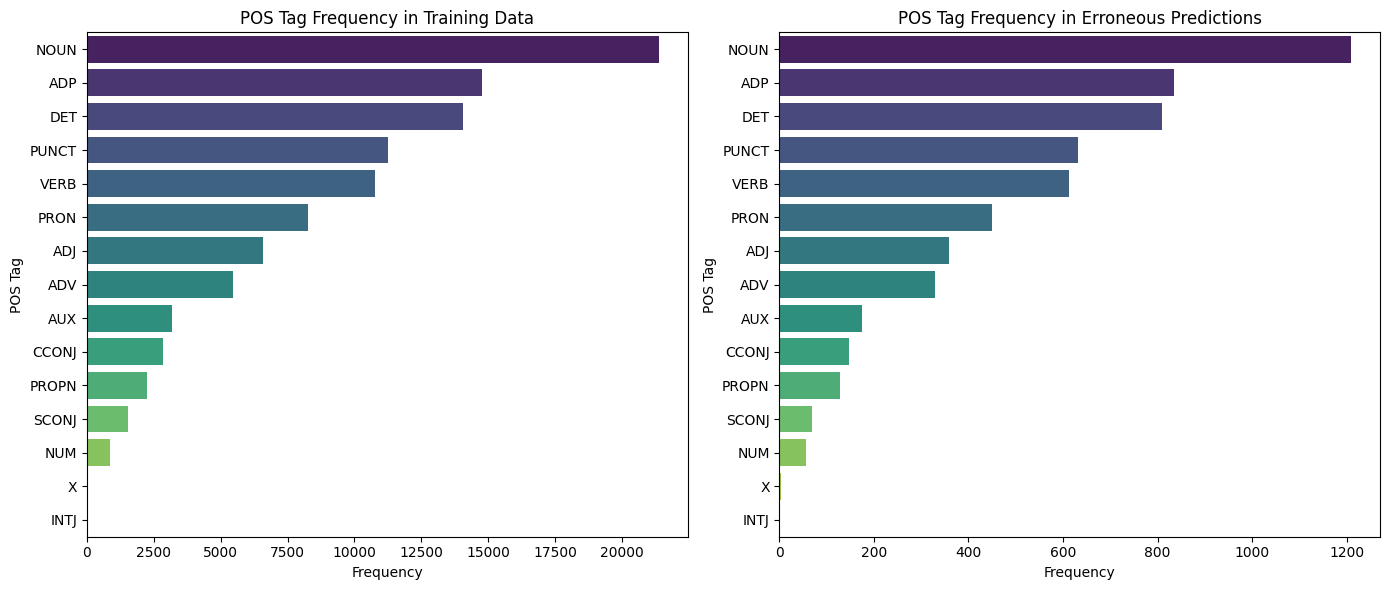

In [48]:
# Install spaCy and the French language model
!pip install spacy
!python -m spacy download fr_core_news_sm

import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Load French language model
nlp = spacy.load("fr_core_news_sm")

# Function to extract POS tags from sentences
def get_pos_tags(sentences):
    pos_tags = []
    for sentence in sentences:
        doc = nlp(sentence)
        pos_tags.extend([token.pos_ for token in doc])
    return pos_tags

# Get POS tags for training data
training_pos_tags = get_pos_tags(training_data_pd['sentence'])

# Get POS tags for erroneous predictions
erroneous_pos_tags = get_pos_tags(errors_df['sentence'])

# Create dataframes for plotting
training_pos_df = pd.DataFrame(training_pos_tags, columns=['POS'])
erroneous_pos_df = pd.DataFrame(erroneous_pos_tags, columns=['POS'])

# Plot POS tag distribution in training data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='POS', data=training_pos_df, order=training_pos_df['POS'].value_counts().index, palette='viridis')
plt.title('POS Tag Frequency in Training Data')
plt.xlabel('Frequency')
plt.ylabel('POS Tag')

# Plot POS tag distribution in erroneous predictions
plt.subplot(1, 2, 2)
sns.countplot(y='POS', data=erroneous_pos_df, order=erroneous_pos_df['POS'].value_counts().index, palette='viridis')
plt.title('POS Tag Frequency in Erroneous Predictions')
plt.xlabel('Frequency')
plt.ylabel('POS Tag')

plt.tight_layout()
plt.show()
